<a href="https://colab.research.google.com/github/SumitHajare/Sumit/blob/main/StockPrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [91]:
from google.colab import files


uploaded = files.upload()

Saving TATAMOTORS.NS.csv to TATAMOTORS.NS (2).csv


In [93]:
df = pd.read_csv("TATAMOTORS.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-24,173.899994,175.000000,169.000000,170.649994,170.119781,15421903
1,2018-10-25,168.949997,169.750000,164.600006,165.350006,164.836258,14877057
2,2018-10-26,166.000000,172.800003,165.899994,168.500000,167.976471,19584723
3,2018-10-29,169.949997,176.500000,167.699997,175.350006,174.805191,14171750
4,2018-10-30,177.000000,181.500000,176.050003,177.250000,176.699280,15602414


In [94]:
#Shape of Data
df.shape

(1236, 7)

In [95]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,308.909021,313.407727,303.920915,308.445995,307.580351,3.705683e+07
std,161.836223,163.038121,160.218212,161.561253,161.241781,3.681975e+07
min,66.500000,66.900002,63.500000,65.300003,65.097115,0.000000e+00
25%,166.887497,170.137497,163.550003,166.924999,166.406357,1.354376e+07
50%,304.024994,307.925003,298.725006,303.600006,302.656708,2.488180e+07
75%,438.550003,442.875008,432.675003,437.612503,436.252846,4.881095e+07
max,670.000000,677.799988,661.250000,668.799988,668.799988,3.905778e+08


In [96]:
#Data Summary
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1236 non-null   object 
 1   Open       1236 non-null   float64
 2   High       1236 non-null   float64
 3   Low        1236 non-null   float64
 4   Close      1236 non-null   float64
 5   Adj Close  1236 non-null   float64
 6   Volume     1236 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [97]:
#Check Null values
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [98]:
df = df[['Date','Open','Close']] #Require columns extracting
df.set_index('Date', inplace=True)

df.head()

,Open,Close
Date,,
2018-10-24,173.899994,170.649994
2018-10-25,168.949997,165.350006
2018-10-26,166.000000,168.500000
2018-10-29,169.949997,175.350006
2018-10-30,177.000000,177.250000


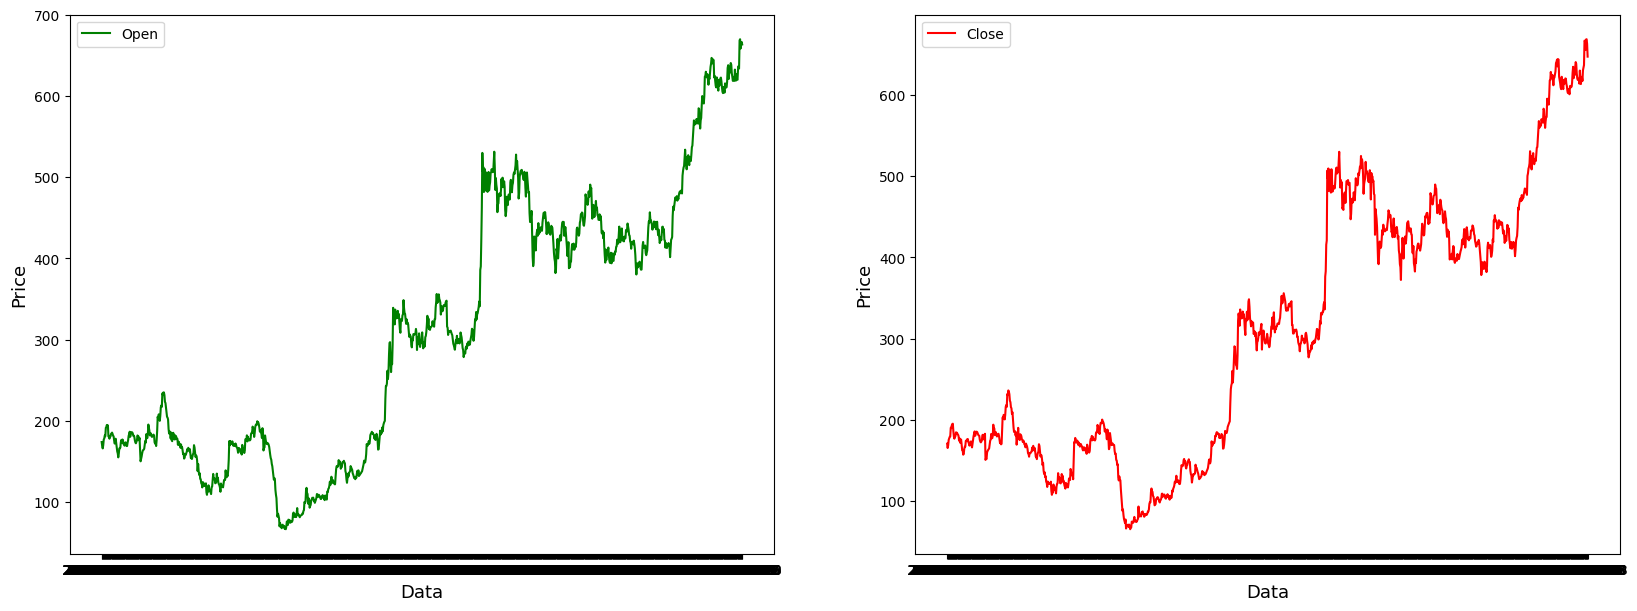

In [99]:
# Now we plotting open and closing price on date index
fig, ax = plt.subplots(1,2, figsize=(20,7))
ax[0].plot(df['Open'], label = 'Open', color = 'green')
ax[0].set_xlabel('Data', size=13)
ax[0].set_ylabel('Price', size=13)
ax[0].legend()
ax[1].plot(df['Close'], label = 'Close', color = 'red')
ax[1].set_xlabel('Data', size=13)
ax[1].set_ylabel('Price', size=13)
ax[1].legend()

In [100]:
# we'll normalizing all the values of all columns using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df[df.columns] = mms.fit_transform(df)
df.head()

,Open,Close
Date,,
2018-10-24,0.177962,0.174565
2018-10-25,0.169760,0.165783
2018-10-26,0.164872,0.171002
2018-10-29,0.171417,0.182353
2018-10-30,0.183099,0.185501


In [101]:
#split data into Training and testing
training_size = round(len(df) * 0.75) #75% for training
training_size

927

In [102]:
training_data = df[:training_size]
testing_data = df[training_size:]
training_data.shape, testing_data.shape

((927, 2), (309, 2))

In [103]:
# we'll create sequence of data for training and testing
def create_sequence(dataset):
 sequence = []
 labels = []

 start_idx = 0

 for stop_idx in range(50, len(dataset)): #selecting 50 rows at a time
    sequence.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
 return (np.array(sequence), np.array(labels))

In [104]:
train_seq, train_label, = create_sequence(training_data)
test_seq, test_label = create_sequence(testing_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((877, 50, 2), (877, 2), (259, 50, 2), (259, 2))

Create LSTM Model

In [105]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [106]:
#import Sequential from keras.models
model = Sequential()
#import Dense, Dropout, LSTM, Bidirectional from keras.layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs = 100, validation_data = (test_seq, test_label), verbose = 1)

Epoch 1/100
28/28 [==============================] - 6s 85ms/step - loss: 0.0161 - mean_absolute_error: 0.0884 - val_loss: 0.0031 - val_mean_absolute_error: 0.0474
Epoch 2/100
28/28 [==============================] - 1s 52ms/step - loss: 0.0023 - mean_absolute_error: 0.0346 - val_loss: 0.0045 - val_mean_absolute_error: 0.0550
Epoch 3/100
28/28 [==============================] - 2s 80ms/step - loss: 0.0014 - mean_absolute_error: 0.0263 - val_loss: 0.0022 - val_mean_absolute_error: 0.0391
Epoch 4/100
28/28 [==============================] - 2s 68ms/step - loss: 0.0015 - mean_absolute_error: 0.0255 - val_loss: 0.0029 - val_mean_absolute_error: 0.0442
Epoch 5/100
28/28 [==============================] - 1s 52ms/step - loss: 0.0015 - mean_absolute_error: 0.0258 - val_loss: 0.0030 - val_mean_absolute_error: 0.0449
Epoch 6/100
28/28 [==============================] - 1s 53ms/step - loss: 0.0014 - mean_absolute_error: 0.0253 - val_loss: 0.0017 - val_mean_absolute_error: 0.0343
Epoch 7/100
28/2

In [108]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 [==============================] - 1s 14ms/step


array([[0.561204  , 0.5539608 ],
       [0.56604964, 0.5588199 ],
       [0.5554798 , 0.548911  ],
       [0.54272133, 0.53687495],
       [0.5366255 , 0.530942  ]], dtype=float32)

In [109]:
# Inversing normalization/scaling on predicted data
test_inverse_predicted = mms.inverse_transform(test_predicted)
test_inverse_predicted[:5]


array([[405.18665, 399.61533],
       [408.11096, 402.5478 ],
       [401.7321 , 396.56778],
       [394.03232, 389.30402],
       [390.35352, 385.7235 ]], dtype=float32)

PREDICTED DATA VS VISUALIZING ACTUAL

In [110]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-259:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-259:].index)], axis=1)

In [111]:
# Inversing normalization/scaling
df_merge[['Open','Close']] = mms.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2022-10-07,413.399994,412.149994,405.186646,399.615326
2022-10-10,403.399994,395.950012,408.110962,402.547791
2022-10-11,397.000000,393.350006,401.732086,396.567780
2022-10-12,394.549988,396.549988,394.032318,389.304016
2022-10-13,396.549988,399.000000,390.353516,385.723511


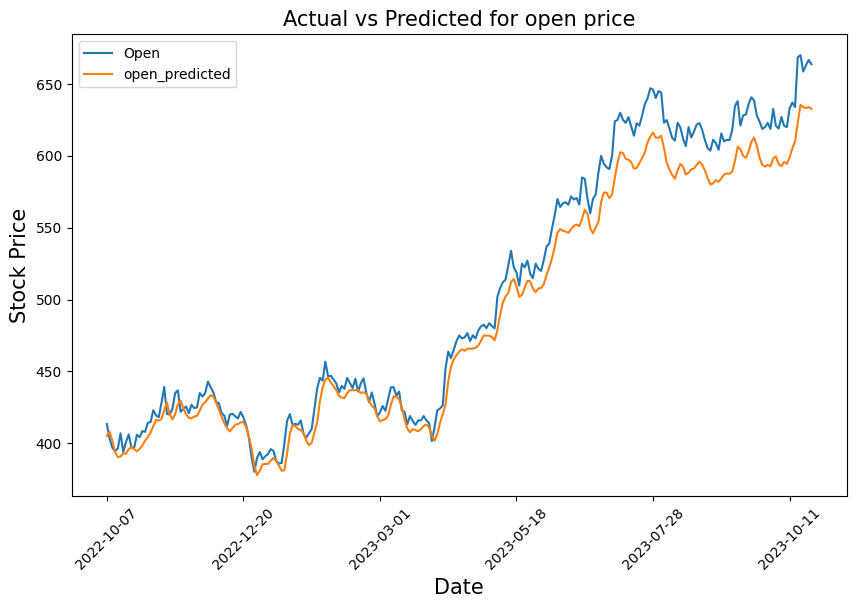

In [112]:
# plotting the actual open and predicted open prices on date index
df_merge[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

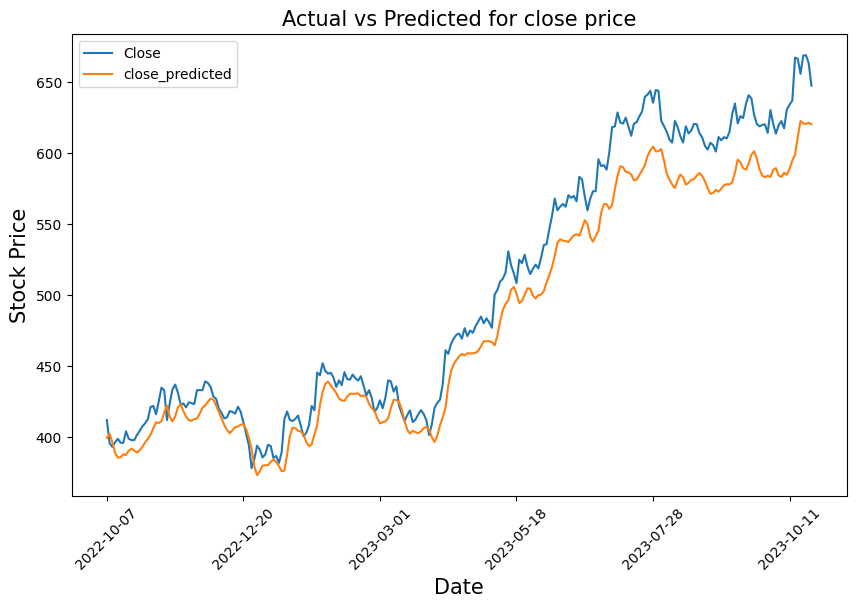

In [113]:
# plotting the actual close and predicted close prices on date index
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [126]:
# Creating a dataframe and adding 10 days to existing index

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=10, freq='D', closed='right')))
df_merge.head(260)

,Open,Close,open_predicted,close_predicted
2022-10-07,413.399994,412.149994,405.186646,399.615326
2022-10-10,403.399994,395.950012,408.110962,402.547791
2022-10-11,397.000000,393.350006,401.732086,396.567780
2022-10-12,394.549988,396.549988,394.032318,389.304016
2022-10-13,396.549988,399.000000,390.353516,385.723511
...,...,...,...,...
2023-10-18,658.599976,668.500000,633.879028,620.796326
2023-10-19,662.950012,668.799988,633.166260,620.386963
2023-10-20,666.650024,663.200012,633.937500,621.293213
2023-10-23,663.650024,647.349976,632.684692,620.209595
